In [2]:
import pandas as pd

# results.csv is an manually created doc

file_path = "/content/sample_data/results.csv"

data = pd.read_csv(file_path, delimiter=';', skip_blank_lines=True)

data.columns = [col.strip().replace("\\t", " ").replace("\t", " ") for col in data.columns]

print(data.head())


            Evaluation  Base Model Real data  Base Model Synthetic data  \
0  Average Dataset CER              0.013917                   0.098361   
1    Average Model CER              0.017546                   0.192193   
2  Average Dataset WER              0.062078                   0.219862   
3    Average model WER              0.081895                   1.018848   
4         Average PCIS             -0.003779                  -0.097345   

   Synth Model Real data  Synth model Synthetic data  Mixed Model Real data  \
0               0.013917                    0.098361               0.013917   
1               0.022047                    0.152587               0.019771   
2               0.062078                    0.219862               0.062078   
3               0.102604                    0.802819               0.087237   
4              -0.008422                   -0.060446              -0.006174   

   Mixed Model Synthetic data  
0                    0.098361  
1         

In [3]:
import json

average_real_data_cer = 0.01391665
average_synth_data_cer = 0.09836092

average_real_data_wer = 0.06207812
average_synth_data_wer = 0.21986217
models = {
    "Base Model": {
        "Real data": {
            "Average Model CER": data.iloc[1, 1],
            "Average Model WER": data.iloc[3, 1],
            "Average PCIS": data.iloc[4, 1]
        },
        "Synth Data": {
            "Average Model CER": data.iloc[1, 2],
            "Average Model WER": data.iloc[3, 2],
            "Average PCIS": data.iloc[4, 2]
        }
    },
    "Synth Model": {
        "Real data": {
            "Average Model CER": data.iloc[1, 3],
            "Average Model WER": data.iloc[3, 3],
            "Average PCIS": data.iloc[4, 3]
        },
        "Synth Data": {
            "Average Model CER": data.iloc[1, 4],
            "Average Model WER": data.iloc[3, 4],
            "Average PCIS": data.iloc[4, 4]
        }
    },
    "Mixed Model": {
        "Real data": {
            "Average Model CER": data.iloc[1, 5],
            "Average Model WER": data.iloc[3, 5],
            "Average PCIS": data.iloc[4, 5]
        },
        "Synth Data": {
            "Average Model CER": data.iloc[1, 6],
            "Average Model WER": data.iloc[3, 6],
            "Average PCIS": data.iloc[4, 6]
        }
    }
}

json_data = json.dumps(models, indent=4)

print(json_data)

{
    "Base Model": {
        "Real data": {
            "Average Model CER": 0.01754558,
            "Average Model WER": 0.08189486,
            "Average PCIS": -0.00377946
        },
        "Synth Data": {
            "Average Model CER": 0.19219267,
            "Average Model WER": 1.01884786,
            "Average PCIS": -0.09734535
        }
    },
    "Synth Model": {
        "Real data": {
            "Average Model CER": 0.02204702,
            "Average Model WER": 0.10260357,
            "Average PCIS": -0.0084225
        },
        "Synth Data": {
            "Average Model CER": 0.15258657,
            "Average Model WER": 0.8028194,
            "Average PCIS": -0.06044562
        }
    },
    "Mixed Model": {
        "Real data": {
            "Average Model CER": 0.01977127,
            "Average Model WER": 0.08723665,
            "Average PCIS": -0.00617385
        },
        "Synth Data": {
            "Average Model CER": 0.19205506,
            "Average Model WER": 1.

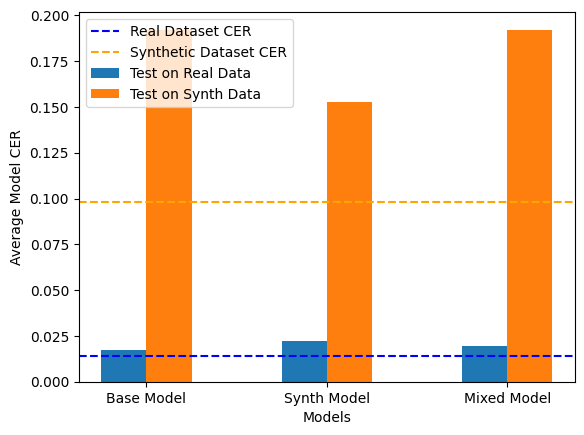

In [135]:
import matplotlib.pyplot as plt
import numpy as np

models = json.loads(json_data)

x = np.array(["Base Model", "Synth Model", "Mixed Model"])

y_real_data = np.array([
    models["Base Model"]["Real data"]["Average Model CER"],
    models["Synth Model"]["Real data"]["Average Model CER"],
    models["Mixed Model"]["Real data"]["Average Model CER"]
])

y_synth_data = np.array([
    models["Base Model"]["Synth Data"]["Average Model CER"],
    models["Synth Model"]["Synth Data"]["Average Model CER"],
    models["Mixed Model"]["Synth Data"]["Average Model CER"]
])

bar_width = 0.25
index = np.arange(len(x))

fig, ax = plt.subplots()

bar1 = ax.bar(index, y_real_data, bar_width, label='Test on Real Data')

bar2 = ax.bar(index + bar_width, y_synth_data, bar_width, label='Test on Synth Data')

ax.axhline(average_real_data_cer, color='blue', linestyle='--', label='Real Dataset CER')
ax.axhline(average_synth_data_cer, color='orange', linestyle='--', label='Synthetic Dataset CER')

ax.set_xlabel('Models')
ax.set_ylabel('Average Model CER')
#ax.set_title('Comparison of Average Model CER for Real and Synth Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x)
ax.legend()
plt.show()

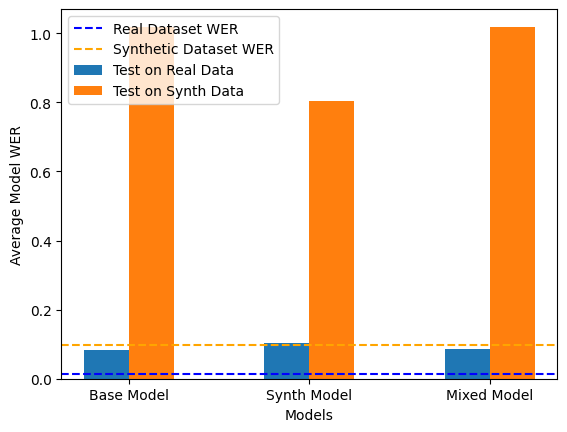

In [136]:
models = json.loads(json_data)

x = np.array(["Base Model", "Synth Model", "Mixed Model"])

y_real_data = np.array([
    models["Base Model"]["Real data"]["Average Model WER"],
    models["Synth Model"]["Real data"]["Average Model WER"],
    models["Mixed Model"]["Real data"]["Average Model WER"]
])

y_synth_data = np.array([
    models["Base Model"]["Synth Data"]["Average Model WER"],
    models["Synth Model"]["Synth Data"]["Average Model WER"],
    models["Mixed Model"]["Synth Data"]["Average Model WER"]
])

bar_width = 0.25
index = np.arange(len(x))

fig, ax = plt.subplots()

bar1 = ax.bar(index, y_real_data, bar_width, label='Test on Real Data')

bar2 = ax.bar(index + bar_width, y_synth_data, bar_width, label='Test on Synth Data')

ax.axhline(average_real_data_cer, color='blue', linestyle='--', label='Real Dataset WER')
ax.axhline(average_synth_data_cer, color='orange', linestyle='--', label='Synthetic Dataset WER')

ax.set_xlabel('Models')
ax.set_ylabel('Average Model WER')
#ax.set_title('Comparison of Average Model WER for Real and Synth Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x)
ax.legend()
plt.show()

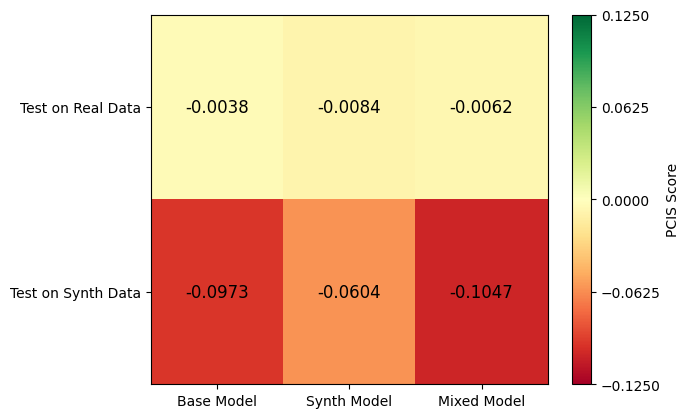

In [137]:
import json

models = json.loads(json_data)

x = np.array(["Base Model", "Synth Model", "Mixed Model"])

y_real_data = np.array([
    models["Base Model"]["Real data"]["Average PCIS"],
    models["Synth Model"]["Real data"]["Average PCIS"],
    models["Mixed Model"]["Real data"]["Average PCIS"]
])

y_synth_data = np.array([
    models["Base Model"]["Synth Data"]["Average PCIS"],
    models["Synth Model"]["Synth Data"]["Average PCIS"],
    models["Mixed Model"]["Synth Data"]["Average PCIS"]
])

data = np.array([y_real_data, y_synth_data])

cmap = plt.get_cmap('RdYlGn')
norm = plt.Normalize(vmin=-0.125, vmax=0.125, clip=True)

fig, ax = plt.subplots()

cax = ax.imshow(data, cmap=cmap, aspect='auto', norm=norm)

cbar = plt.colorbar(cax)
cbar.set_label('PCIS Score')
cbar.set_ticks(np.linspace(-0.125, 0.125, 5))

#ax.set_title('Average of post-correction improvement score per model and dataset evaluation type')

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x)
ax.set_yticks(np.arange(2))
ax.set_yticklabels(['Test on Real Data', 'Test on Synth Data'])

for i in range(len(x)):
    for j in range(2):
        ax.text(i, j, f'{data[j, i]:.4f}', ha='center', va='center', color='black', fontsize=12)

plt.show()
